### Домашнее задание "Визуализация данных в Python"

**Что делать**

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.


### Hotel booking demand
From the paper: hotel booking demand datasets

Dataset - https://www.kaggle.com/jessemostipak/hotel-booking-demand/data

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Посмотрим на нашу базу данных.

Набор данных не содержит пропусков. Количество заполненных строк в каждом столбце совпадает.

In [2]:
bookings = pd.read_csv('hotel-booking-demand/hotel_bookings.csv')
bookings.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,booking_changes,deposit_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,3,No Deposit,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,4,No Deposit,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,0,No Deposit,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,0,No Deposit,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,0,No Deposit,0,1,Check-Out


In [3]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 19 columns):
hotel                          119390 non-null object
is_canceled                    119390 non-null int64
lead_time                      119390 non-null int64
arrival_date_year              119390 non-null int64
arrival_date_month             119390 non-null object
arrival_date_week_number       119390 non-null int64
arrival_date_day_of_month      119390 non-null int64
stays_in_weekend_nights        119390 non-null int64
stays_in_week_nights           119390 non-null int64
adults                         119390 non-null int64
children                       119386 non-null float64
babies                         119390 non-null int64
meal                           119390 non-null object
country                        118902 non-null object
booking_changes                119390 non-null int64
deposit_type                   119390 non-null object
required_car_parking_spaces    119

**За сколько дней бронируют и отменяют брони отелей**

hotel - Hotel (H1 = Resort Hotel or H2 = City Hotel)

is_canceled - Value indicating if the booking was canceled (1) or not (0)

lead_time - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date


Text(0, 0.5, 'Bookings')

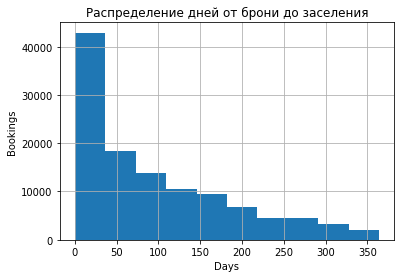

In [4]:
bookings_a = bookings.loc[:, ['hotel', 'is_canceled', 'lead_time']]

# Так как есть несколько бронирований со сроком больше года, я удалила данные, чтобы видеть на графике более корректное распределение
bookings_a = bookings_a [ bookings_a.lead_time < 365]
#bookings_a.head()

ax = bookings_a.lead_time.hist(bins = 10)
ax.set_title('Распределение дней от брони до заселения')
ax.set_xlabel('Days')
ax.set_ylabel('Bookings')

Большинство бронирований происходит в течение месяца до заселения в отель.

Есть обратная корелляция между сроком и количеством бронирований. С увеличением временного периода количество бронирований снижается. При этом существует статистически значимое количество людей, которые бронируют отели за 6-12 месяцев до поездки.

Так как большая часть бронирований происходит во временном диапазоне от 0 до 50 дней, рассмотрим этот временной диапазон более подробно.

Процент людей, которые бронируют отель в тот же или за 1 день - 8.44%
Процент людей, которые бронируют отель за неделю - 33.32%


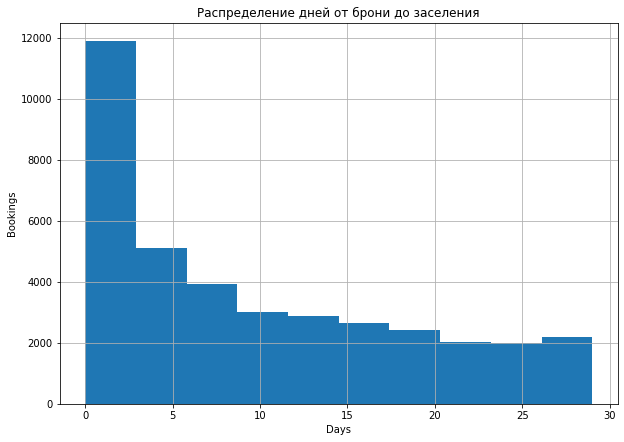

In [174]:
bookings_a50 = bookings_a [ bookings_a.lead_time < 30]
days1 = len(bookings_a [ bookings_a.lead_time <= 1])/len(bookings_a)*100
days2 = len(bookings_a [ bookings_a.lead_time <= 30])/len(bookings_a)*100

ax = bookings_a50.lead_time.hist(bins = 10)
ax.set_title('Распределение дней от брони до заселения')
ax.set_xlabel('Days')
ax.set_ylabel('Bookings')

print(f'Процент людей, которые бронируют отель в тот же или за 1 день - {days1:.2f}%')
print(f'Процент людей, которые бронируют отель за неделю - {days2:.2f}%')

Даже, если рассмотреть первые 30 дней, то очень наглядно видно, что больше всего бронирований совершается день в день или за одни день до заселения. Процент таких бронирований составляет 8,44% от общего количества. И 33% людей бронируют отель в течение месяца до поездки.

Далее интересно было бы рассмотреть момент, совершаются ли бронирования день в день онлайн или на месте и на основе этих данных можно принять решение о необходимости наружной рекламы, например.

In [173]:
bookings_c = bookings_a [ bookings_a.lead_time < 31]

bookings_delay_ = bookings_c.groupby(['lead_time']).agg({'hotel': 'count', 'is_canceled': 'sum'})
bookings_delay_.head()

trace0 = go.Bar(
    x=bookings_delay_.index,
    y=bookings_delay_.hotel,
    name='Bookings',
    orientation = 'v'
)

trace1 = go.Bar(
    x=bookings_delay_.index,
    y=bookings_delay_.is_canceled,
    name='Canceled',
    orientation = 'v'
)

data = [trace0, trace1]
layout = go.Layout(barmode='stack', title = 'Распределение бронирования и отмены брони')


fig = go.Figure(data=data, layout=layout)

iplot(fig)

stacked=True

Если с уменьшением времени до поездки, количество бронирований стабильно растет, то количество отмен остается примерно на одном и том же уровне. Есть небольшие всплески, но таких значительных калебаний, как для бронирований нет.

Но если посмотреть на соотношение бронирований к отменам, то с приближением даты поездки, процент отмен будет уменьшаться за счет увеличения количества бронирований.


In [162]:
bookings_a3 = bookings_a [ bookings_a.lead_time < 8 ]
bookings_delay1 = bookings_a3.groupby(['lead_time']).agg({'hotel': 'count', 'is_canceled': 'sum'})
percent8 = (sum(bookings_delay1['is_canceled']) / sum(bookings_delay1['hotel']))*100

bookings_a4 = bookings_a [ (bookings_a.lead_time > 29) & (bookings_a.lead_time < 61) ]
bookings_delay2 = bookings_a4.groupby(['lead_time']).agg({'hotel': 'count', 'is_canceled': 'sum'})
percent30 = (sum(bookings_delay2['is_canceled']) / sum(bookings_delay2['hotel']))*100

print(f'Процент отмены брони при бронировании за неделю и меньше - {percent8:.2f}%')
print(f'Процент отмены брони при бронировании 30-60 до поездки - {percent30:.2f}%')

Процент отмены брони при бронировании за неделю и меньше - 9.63%
Процент отмены брони при бронировании 30-60 до поездки - 36.40%


**Количество бронирований по месяцам**

Посмотрим, какие месяцы наиболее популярны.

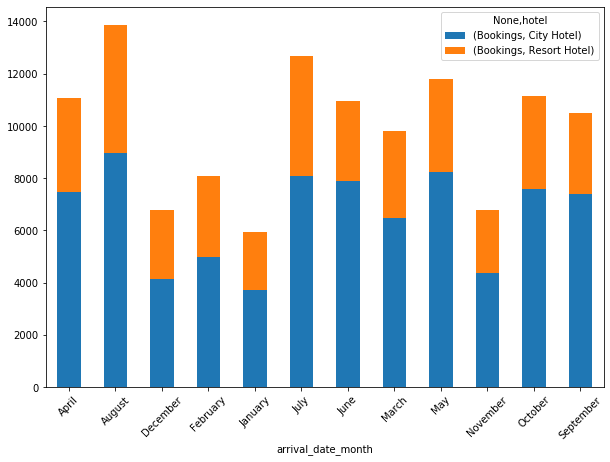

In [163]:
bookings_month = bookings.groupby(
                ['arrival_date_month', 'hotel']).agg(
                {'lead_time': 'count'}).rename(
                columns={'lead_time': 'Bookings'})

bookings_month.unstack('hotel').plot(kind='bar', rot=45, stacked=True)

# Можно ли тут как-то отсортировать месяца по тому, как они идут в календаре?

Больше всего бронирований приходится на Июль и Август. На третьем месте идет май. Низкий сезон - Ноябрь, Декабрь и Январь.

Данное распределение характерно как для городских отелей, так и для резортов.

**Влияние наличия предлоплаты на отмену бронирования**

deposit_type - 
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

Процент бронирований с типом предоплаты Refundable - 0.14%


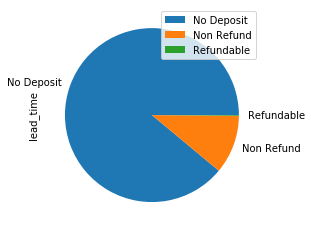

In [32]:
bookings_deposit = bookings.loc[:, ['deposit_type', 'is_canceled', 'lead_time']]
bookings_deposit = bookings_deposit [ bookings_deposit.lead_time < 365]
bookings_deposit_pie = bookings_deposit.groupby(['deposit_type']).agg({'lead_time': 'count', 'is_canceled': 'sum'})

Refundable = bookings_deposit [ bookings_deposit.deposit_type == 'Refundable' ]

bookings_deposit_pie.plot(kind='pie', y='lead_time')
print(f'Процент бронирований с типом предоплаты Refundable - {len(Refundable)/len(bookings_deposit)*100:.2f}%')

Для преобладающего числа бронирований депозит не требуется. Со значением Refundable всего 162 записи или 0,14% от общего числа бронирований.

Для дальнейших расчетов исключим эти данные как не релевантные.

Процент отмены бронирований без предоплаты - 28.47%
Процент отмены бронирований при наличии предоплаты - 99.27%


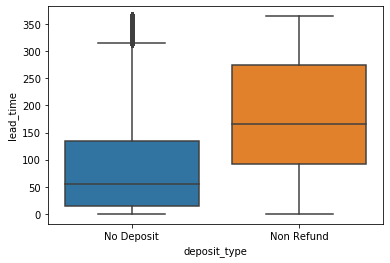

In [34]:
# Визуализация из библиотеки Seaborn

bookings_deposit_ = bookings_deposit [ ~(bookings_deposit.deposit_type == 'Refundable') ]
bookings_deposit_no = bookings_deposit [ bookings_deposit.deposit_type == 'No Deposit' ]
bookings_deposit_Non_Refund = bookings_deposit [ bookings_deposit.deposit_type == 'Non Refund' ]

perc_no_dep = (sum(bookings_deposit_no['is_canceled'])/len(bookings_deposit_no))*100
perc_non_ref = (sum(bookings_deposit_Non_Refund['is_canceled'])/len(bookings_deposit_Non_Refund))*100


ax = sns.boxplot(x=bookings_deposit_['deposit_type'], y=bookings_deposit_['lead_time'])
print(f'Процент отмены бронирований без предоплаты - {perc_no_dep:.2f}%')
print(f'Процент отмены бронирований при наличии предоплаты - {perc_non_ref:.2f}%')

В среднем, бронирования без депозита совершаются примерно за 2 месяца до поездки, а медиана для бронирований с невозвратным депозитом - порядка 6 месяцев до поездки.

Но, если посмотреть на процент отмены в группах при наличии депозита и без него, то можно обратить внимание, что более 99% бронирований с предоплатой были отменены.

Скорее всего здесь есть какая-то ошибка в данных.

**Из какой страны совершают больше бронирований?**

Посмотрим на бронирования отелей в разрезе стран и зависит ли срок бронирования от страны.

In [139]:
countries = bookings.loc[:, ['country', 'lead_time', 'is_canceled']]
countries['bookings'] = 1
countries = countries [ countries.lead_time < 30]

countries_group = countries.groupby(
                    ['country']).agg(
                    {'lead_time': 'mean', 'is_canceled': 'sum', 'bookings': 'sum'}).sort_values(
                    'bookings', ascending=False)

countries_group_10 = countries_group.sort_values('bookings', ascending = False).head(10).index.values

countries_group_TOP = countries [ countries.country.isin(countries_group_10)]
countries_group_TOP.head()

,country,lead_time,is_canceled,bookings
2,GBR,7,0,1
3,GBR,13,0,1
4,GBR,14,0,1
5,GBR,14,0,1
6,PRT,0,0,1


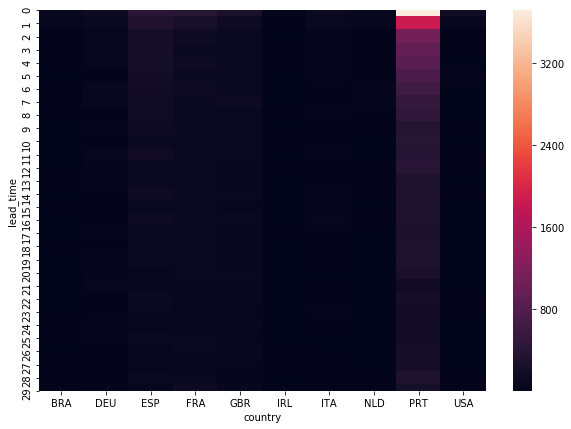

In [140]:
pivot_sample = countries_group_TOP.pivot_table(
                       index='lead_time', 
                       columns='country', 
                       values='bookings', 
                       aggfunc=sum).fillna(0).applymap(float)

ax = sns.heatmap(pivot_sample)

Больше всего бронирований приходится на Португалию.

Так как в данных много крайних значений, я ограничила временной диапазон - месяц до заезда, и выбрала только ТОП-10 стран с самым большим количеством бронирований.

Но даже при этих данных, наибольшая часть бронирований приходится на Португалию и бронирования в день поездки. Я исключу эти данные, чтобы посмотреть как будет выглядеть тепловая карта без крайних значений.

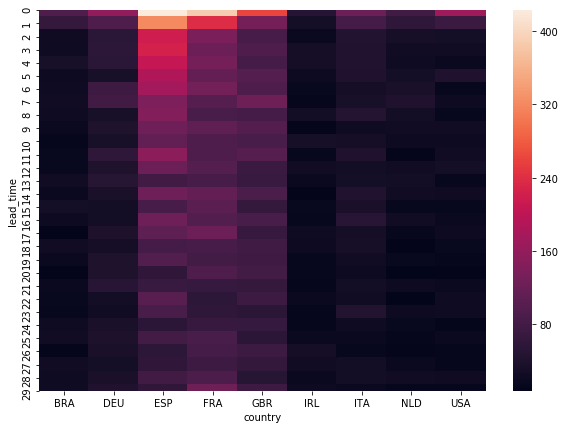

In [143]:
countries_group_TOP_1 = countries_group_TOP [ ~(countries_group_TOP.country == 'PRT')]
pivot_sample = countries_group_TOP_1.pivot_table(
                       index='lead_time', 
                       columns='country', 
                       values='bookings', 
                       aggfunc=sum).fillna(0).applymap(float)

ax = sns.heatmap(pivot_sample)

Возможно, наш датасет был собран в Португалии, поэтому на нее приходится большее количество данных. Скорее всего это предположение верно, потому что в ТОП стран по бронированию также входят близкие географически с Португалией страны: Испания и Франция. Также на тепловой карте хорошо видно, что в ТОП выходит и Великобритания, которая географически находится дальше. 

В целом, для всех стран характерно last minute бронирование. Количество броней с приближением срока заезда увеличивается для всех стран.
